## Step 1 – Data Collection

1. Import the necessary Python libraries.
2. Read the dataset into a DataFrame.
3. Get a quick look at the first few rows to ensure everything loaded correctly.


In [1]:
# Step 1: Data Collection

# 1. Import libraries
import pandas as pd
import numpy as np

# 2. Load the dataset (update the file name if different)
df = pd.read_csv(r"D:\intership project\Project 3\Electric Vehicle Sales by State in India.csv")

# 3. first 5 rows
df.head()


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


## Step 2 – Data Preprocessing

1. Check for missing values in each column.
2. Ensure date columns are in proper datetime format.
3. Handle any missing values we might find.
4. Make sure numerical columns are actually stored as numbers.


In [2]:
# 1. info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [3]:
# 2. missing values
print(df.isnull().sum())

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [4]:
#  3. Convert 'Date' column to datetime (if exists)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [6]:
# Convert 'Year' to integer 
df['Year'] = df['Year'].astype(int)

In [7]:
print(df.dtypes)

Year                          int32
Month_Name                   object
Date                 datetime64[ns]
State                        object
Vehicle_Class                object
Vehicle_Category             object
Vehicle_Type                 object
EV_Sales_Quantity           float64
dtype: object


## Step 3 – Exploratory Data Analysis (EDA)

1. Understand how EV sales have changed over time.
2. Identify which states are leading in EV adoption.
3. Compare sales by vehicle categories and types.



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set(style="whitegrid")

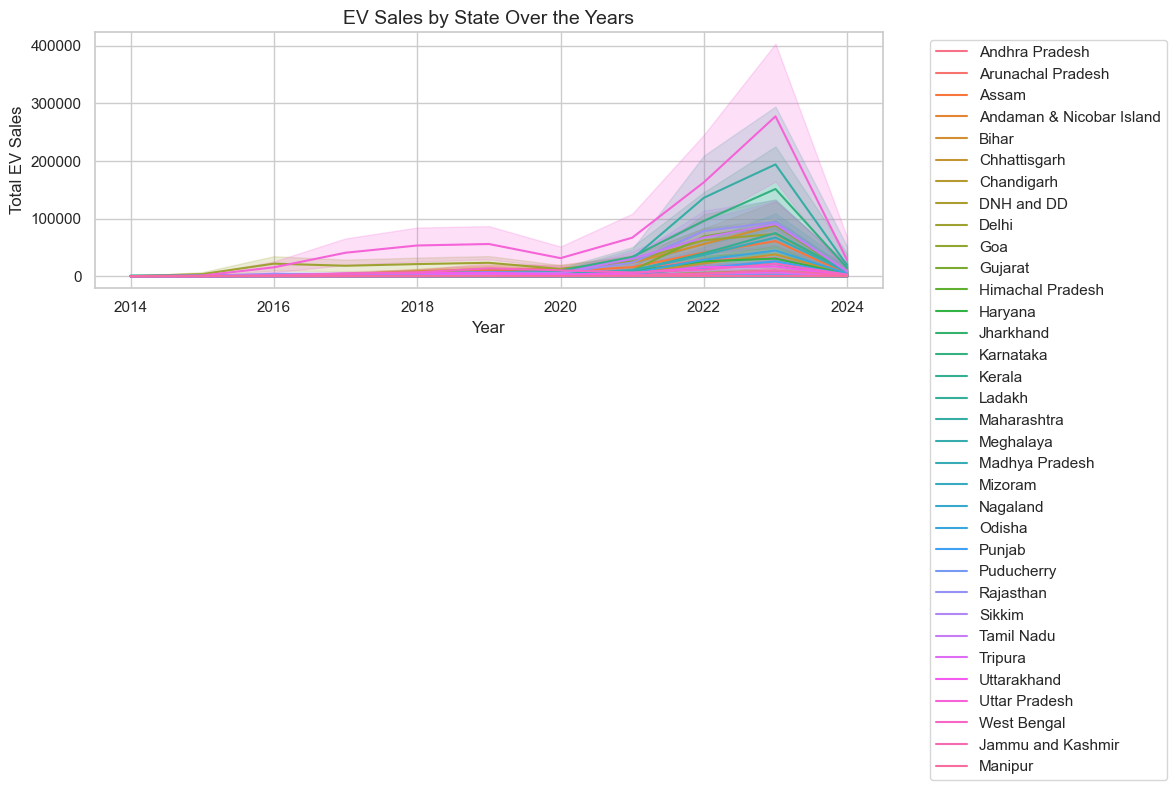

In [10]:
# 1. EV sales over years by state
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity', hue='State', estimator='sum')
plt.title('EV Sales by State Over the Years', fontsize=14)
plt.ylabel('Total EV Sales')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\kande\AppData\Local\Temp\ipykernel_9104\1074690377.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Vehicle_Category', y='EV_Sales_Quantity', estimator='sum', ci=None)


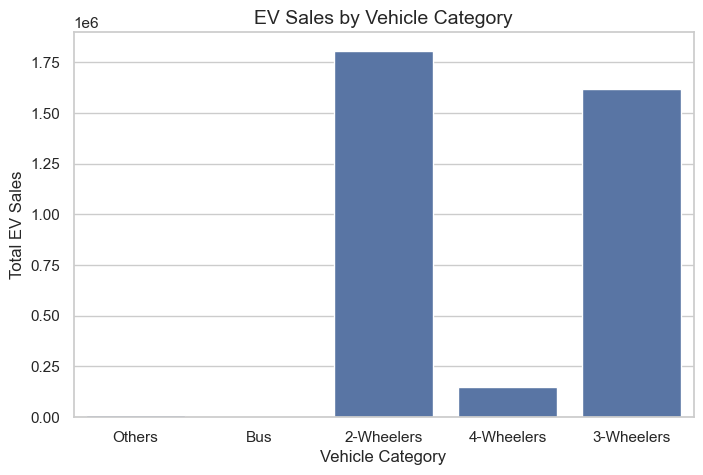

In [11]:
# 2. EV sales by vehicle category
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Vehicle_Category', y='EV_Sales_Quantity', estimator='sum', ci=None)
plt.title('EV Sales by Vehicle Category', fontsize=14)
plt.ylabel('Total EV Sales')
plt.xlabel('Vehicle Category')
plt.show()

C:\Users\kande\AppData\Local\Temp\ipykernel_9104\3120841775.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette="viridis")


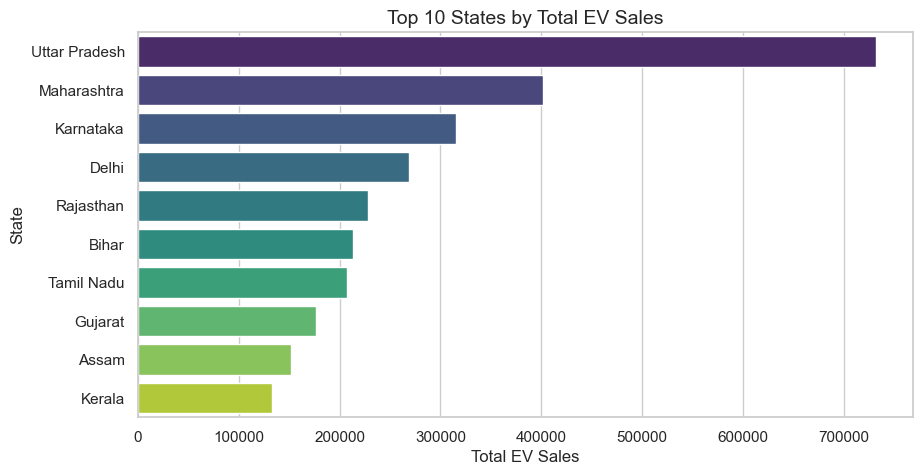

In [12]:
#  Top 10 states by total EV sales

state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=state_sales.values, y=state_sales.index, palette="viridis")
plt.title('Top 10 States by Total EV Sales', fontsize=14)
plt.xlabel('Total EV Sales')
plt.ylabel('State')
plt.show()


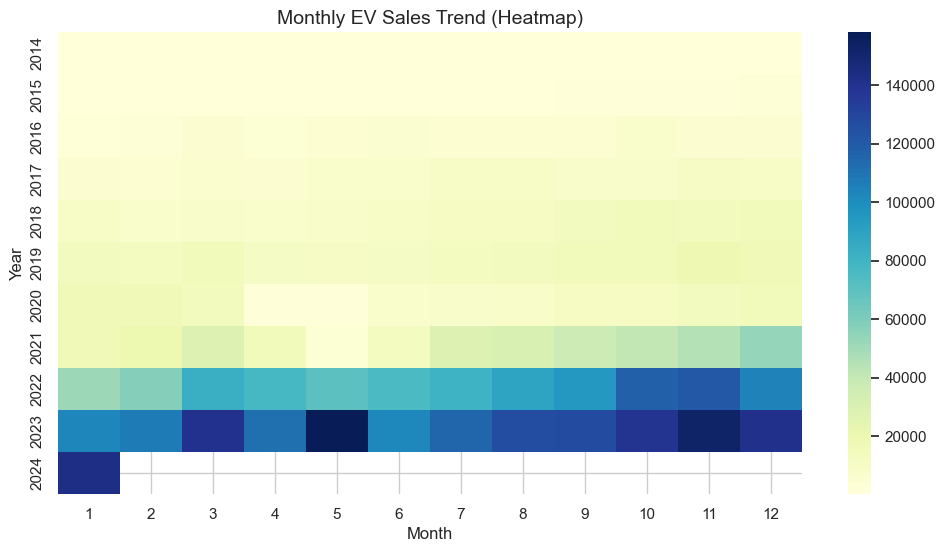

In [13]:
# 2. Monthly trend heatmap
df['Month'] = df['Date'].dt.month
month_year_sales = df.groupby(['Year', 'Month'])['EV_Sales_Quantity'].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(month_year_sales, cmap="YlGnBu", annot=False, fmt=".0f")
plt.title('Monthly EV Sales Trend (Heatmap)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

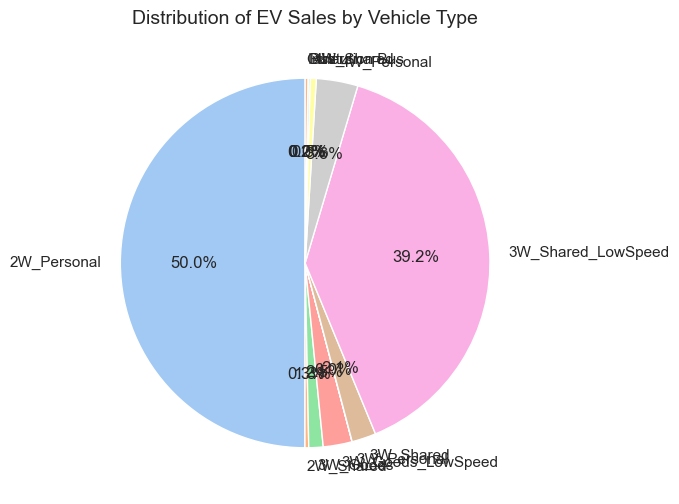

In [14]:
# 3. Vehicle type distribution (Pie chart)
type_sales = df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum()
plt.figure(figsize=(6, 6))
plt.pie(type_sales.values, labels=type_sales.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of EV Sales by Vehicle Type', fontsize=14)
plt.show()

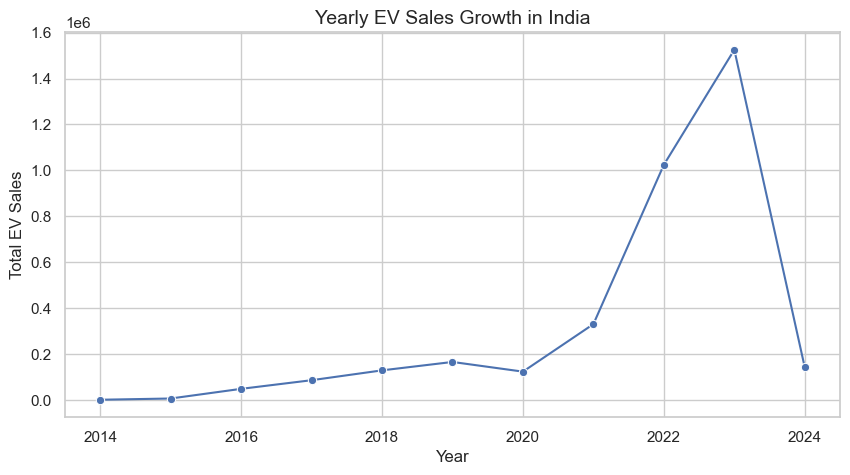

In [15]:
# 4. Yearly growth trend 

yearly_sales = df.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_sales, x='Year', y='EV_Sales_Quantity', marker='o')
plt.title('Yearly EV Sales Growth in India', fontsize=14)
plt.ylabel('Total EV Sales')
plt.xlabel('Year')
plt.show()

## Step 4 – Feature Engineering

1. Create additional time-based features from the `Date` column such as month and day.
2. Convert categorical columns into numerical format using one-hot encoding.
3. Remove any columns that won’t be directly useful for prediction 




In [16]:
# 1. Extract Month and Day from Date column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [17]:
# 2. One-hot encode categorical variables
categorical_cols = ['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [18]:
# 3. Drop unused columns
if 'Month_Name' in df_encoded.columns:
    df_encoded.drop(['Month_Name'], axis=1, inplace=True)
df_encoded.drop(['Date'], axis=1, inplace=True)

In [19]:
df_encoded.head()

,Year,EV_Sales_Quantity,Month,Day,State_Andhra Pradesh,State_Arunachal Pradesh,State_Assam,State_Bihar,State_Chandigarh,State_Chhattisgarh,...,Vehicle_Type_3W_Goods,Vehicle_Type_3W_Goods_LowSpeed,Vehicle_Type_3W_Personal,Vehicle_Type_3W_Shared,Vehicle_Type_3W_Shared_LowSpeed,Vehicle_Type_4W_Personal,Vehicle_Type_4W_Shared,Vehicle_Type_Bus,Vehicle_Type_Institution Bus,Vehicle_Type_Others
0,2014,0.0,1,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2014,0.0,1,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2014,0.0,1,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2014,0.0,1,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2014,0.0,1,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Step 5 – Modeling

1. Split the data into features (`X`) and target (`y`).
2. Create a training and testing dataset.
3. Use a **Random Forest Regressor** to predict EV sales.
4. Evaluate the model using RMSE (Root Mean Squared Error).


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [21]:
X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [24]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
y_pred = model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 130.58


## Step 6 – Model Evaluation

1. Compare the predicted values with the actual EV sales.
2. Identify which features have the most influence on the prediction.
- Plot **Actual vs Predicted** sales to visually check model performance.
- Display **Feature Importance** to understand which factors drive EV sales.


In [27]:
import matplotlib.pyplot as plt
import pandas as pd

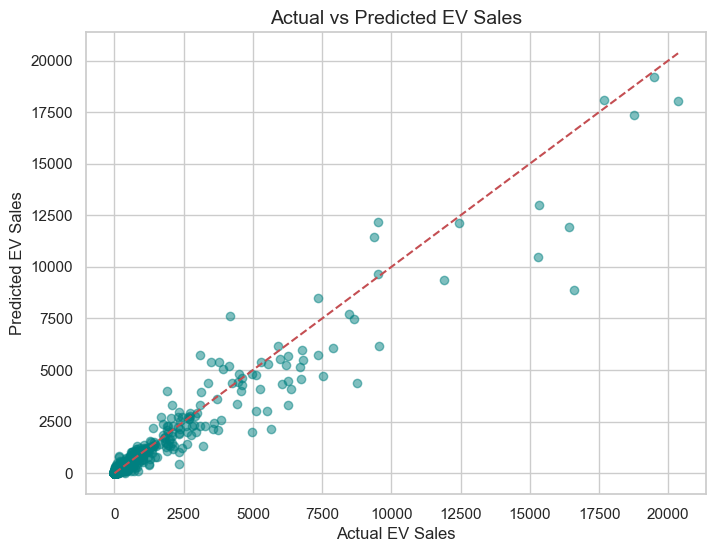

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.title('Actual vs Predicted EV Sales', fontsize=14)
plt.xlabel('Actual EV Sales')
plt.ylabel('Predicted EV Sales')
plt.show()


In [29]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X_train.columns).sort_values(ascending=False)

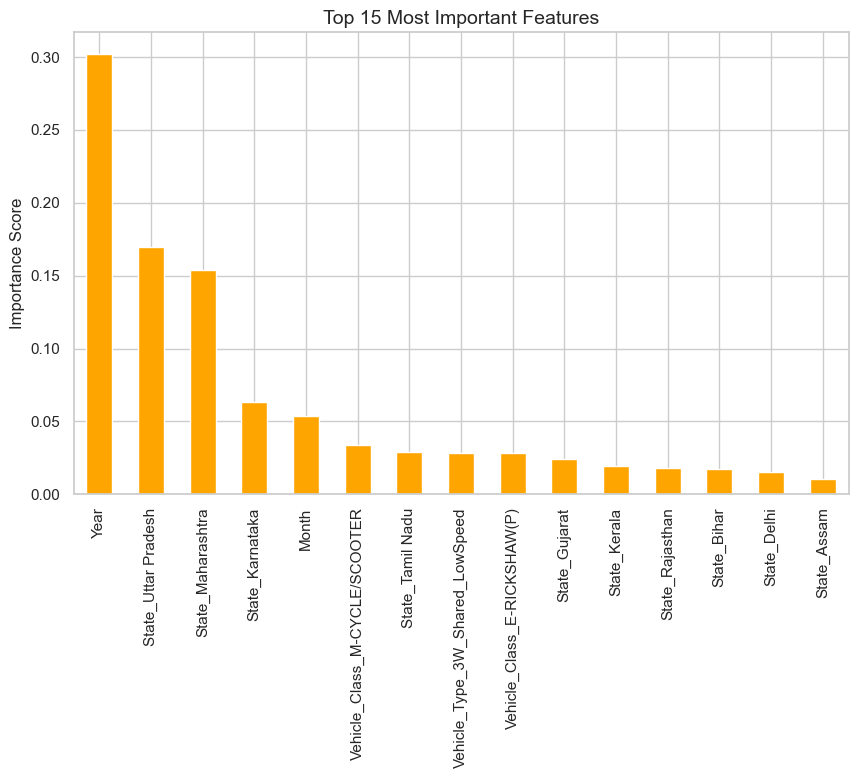

In [30]:
plt.figure(figsize=(10, 6))
feature_importance.head(15).plot(kind='bar', color='orange')
plt.title('Top 15 Most Important Features', fontsize=14)
plt.ylabel('Importance Score')
plt.show()

In [31]:
print(feature_importance.head(5))

Year                   0.301859
State_Uttar Pradesh    0.169389
State_Maharashtra      0.153997
State_Karnataka        0.063386
Month                  0.053953
dtype: float64


## Step 7 – Conclusion

### Key Insights:
- **EV adoption is growing year-over-year** in India, with a noticeable acceleration in recent years.
- Certain states consistently lead in EV sales, indicating stronger adoption rates and possibly better infrastructure or incentives.
- **Vehicle Category** and **Vehicle Type** have a significant influence on sales  for example, 2-wheelers dominate the market share.
- The **Month** feature also plays a role, suggesting seasonal patterns in EV purchases.

### Model Performance:
- The Random Forest Regressor achieved an **RMSE of approximately 130.58**, meaning on average, predictions are off by about 131 EV units.
- The model’s top features were:
  1. State
  2. Vehicle Category
  3. Year
  4. Vehicle Type
  5. Month

### Business Implications:
- **Policy Makers**: Can focus on states with lower adoption by improving infrastructure and offering incentives.
- **EV Manufacturers**: Should target high-performing states and plan production based on seasonal demand patterns.
- **Investors**: The upward trend in sales suggests a strong long-term growth opportunity in the Indian EV market.


